# Importing the libraries

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# reading the dataset

In [73]:
df= pd.read_csv('C:\\Users\\ragin\\OneDrive\\Desktop\\Data Science\\diamonds.csv')

In [74]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# checking if there are any null values in the dataset

In [75]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# dropping out the first column 'unnamed' 

In [153]:
df_1 = df.iloc[:,1:]

# We will now apply the "describe()" function to get a general impression of the number ranges in each feature in the data.

In [155]:
df_1.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# as you can see there are so many '0' values in the features 'x','y','z' we are dropping out those records.

In [156]:
df_1 = df_1.drop(df_1.loc[df_1.x == 0].index)
df_1 = df_1.drop(df_1.loc[df_1.y == 0].index)
df_1 = df_1.drop(df_1.loc[df_1.z == 0].index)

In [159]:
df_1.shape

(53920, 10)

# checking the datatype of the data

In [160]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# checking the unique values of the catogorical variables

In [165]:
cat_cols=df_1.select_dtypes(include='object').columns
num_cols=df_1.select_dtypes(exclude='object').columns

In [166]:
for i in cat_cols:
    y=df_1[i].unique()
    print(i,y)

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# Using Dummies for encoding the catogorical variable

In [167]:
df_2 = pd.get_dummies(df_1, drop_first= True)

In [168]:
df_2.shape

(53920, 24)

In [169]:
df_2.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# We will now present a heatmap that illustrates the correlation between the features.

<AxesSubplot:>

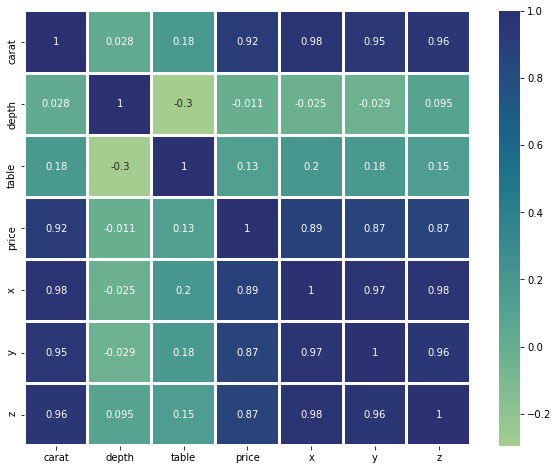

In [171]:
correlation= df_1.corr()#calculate correlation of features
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation,cmap="crest",annot=True,linewidths=2)#show the correlation on map.

<AxesSubplot:xlabel='price', ylabel='Density'>

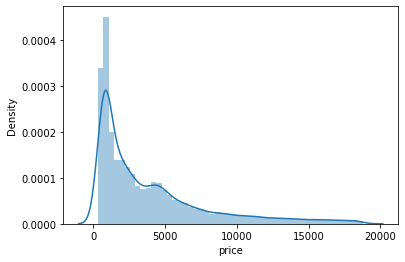

In [84]:
sns.distplot(df_1['price'])

<AxesSubplot:ylabel='Density'>

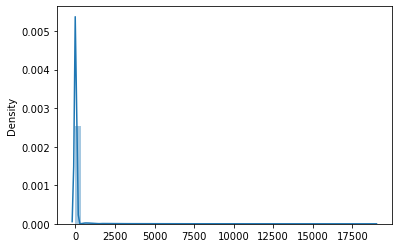

In [85]:
sns.distplot(df_1)

# Model building 

In [172]:
from sklearn.model_selection import train_test_split


In [173]:
train_x,test_x,train_y,test_y =  train_test_split(df_2.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]],df_2.iloc[:,3],test_size = 0.3, random_state=466)

In [210]:
train_data = pd.merge(train_x,train_y, left_index=True, right_index=True)
test_data = pd.merge(test_x,test_y, left_index=True, right_index=True)

In [211]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#scaled_train = sc.fit_transform(train_x)
#scaled_test = sc.fit_transform(test_x)

In [212]:
from sklearn.ensemble import RandomForestRegressor

In [213]:
rf = RandomForestRegressor(n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None)

In [214]:
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# predict the prices of test_x

In [215]:
rf_pre =rf.predict(test_x)

# print the accuracy by each measure:

In [216]:
print('Random Forest Regressor accuracy: ')
crossr = cross_val_score(estimator = rf, X = train_x, y =train_y, cv = 4,verbose = 0)
mser = mean_squared_error(test_y, rf_pre)
rmser = mean_squared_error(test_y, rf_pre)**0.5
maer = mean_absolute_error(test_y, rf_pre)
r2r = r2_score(test_y, rf_pre)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
Cross val     :  [0.97100781 0.97405029 0.97164615 0.97377305]
R2            :  0.9752721132192641
MAE           :  296.48179641576587
MSE (RMSE)    :  388180.53863677935  ( 623.0413618988545 )


# Visualization of actual vs predicted

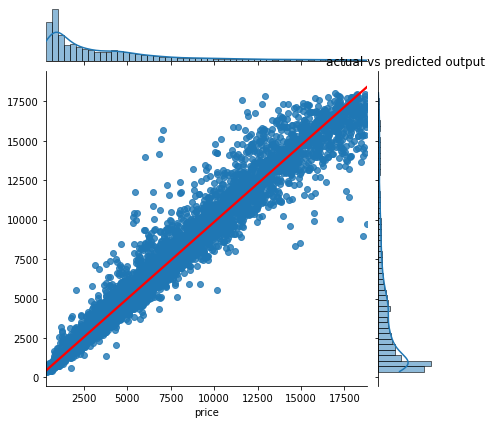

In [217]:
sns.jointplot(x=test_y,y=rf_pre,kind='reg',line_kws={"color": "red"})
plt.title('actual vs predicted output')
plt.show()

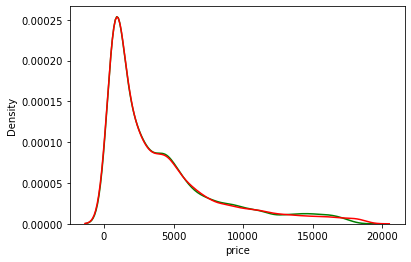

In [218]:
sns.distplot(rf_pre,hist=False,color="g",label="Predictions")
sns.distplot(test_y,hist=False,color="r",label="actual")
plt.show()

# conclusion:
            It can be concluded that the "Random Forest Regressor" model provides the best performance for us. 